In [1]:
import os
#fake_d = '/mnt/data/datasets/rwth-SPADE-train-2022_06_27_16_44_03/train/'
fake_d = '/mnt/data/datasets/rwth-ReACGAN-ADC-DiffAug-train-2022_06_16_15_02_50/train/'
real_d = './data/rwth/train/'

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

def showImagesHorizontally(real_d, fake_d, n_real, n_fake, classes):
    n_classes = len(classes)
    fig, axs = plt.subplots(n_classes, n_real+n_fake)    
    for i in range(n_classes):
        real_list = os.listdir(os.path.join(real_d,classes[i]))
        fake_list = os.listdir(os.path.join(fake_d,classes[i]))
        for j in range(n_real):
            image = imread(os.path.join(real_d,classes[i],real_list[j]))
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
        for j in range(n_fake):
            image = imread(os.path.join(fake_d,classes[i],fake_list[j]))
            axs[i, j+n_real].imshow(image)
            axs[i, j+n_real].axis('off')

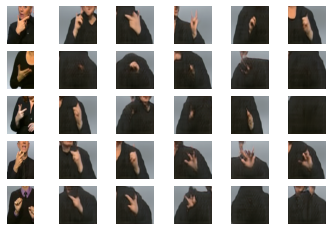

In [20]:
classes = os.listdir(real_d)
showImagesHorizontally(real_d, fake_d, 1, 5, classes[10:15])